In [34]:
# import packages
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 현재 파일 경로 확인
os.getcwd()

'/Users/nosangho/Documents/강의자료/올인원 패키지 _ 머신러닝과 데이터분석 A-Z/2. [Machine Learning]/PART 2) 회귀분석/3. 실습데이터'

In [6]:
# Read Data
df = pd.read_csv('./Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [11]:
# y columns 설정
target = df[['Target']]

## 다중선형 회귀분석

### 몇개의 변수를 설정하여 다중선형 회귀모형 테스트

In [8]:
# sample로 crim, rm, lstat를 선택해서 실습
X = df[['CRIM', 'RM', 'LSTAT']]
X.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [9]:
# 상수항 추가
X_1 = sm.add_constant(X, has_constant='add')

In [12]:
# 모델 생성 및 피팅
multi_model = sm.OLS(target, X_1)
fit_multi_model = multi_model.fit()

In [13]:
print(fit_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          1.01e-112
Time:                        08:31:30   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.4

In [15]:
# statsmodel의 OLS function을 사용한 파라미터 추정값
fit_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [27]:
# 행렬을 이용하여 (X'X)-1X'Y를 사용하여 추정한 값
from numpy import linalg
ba = linalg.inv((np.dot(X_1.T, X_1)))
np.dot(np.dot(ba, X_1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [29]:
# 모델에 x를 대입하여 y를 예측 --> 실제 y값과 비교하여 잔차의 분포가 어떤지 확인
pred = fit_multi_model.predict(X_1)

## 잔차 분포 확인

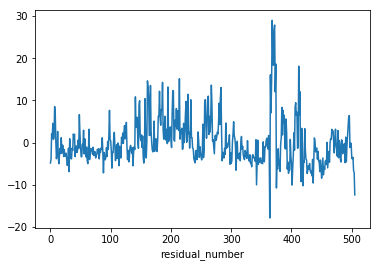

In [35]:
fit_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()